# Packages

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import yfinance as yf
import yahoofinancials
import seaborn as sn
from scipy.stats import anderson,kstest,shapiro, probplot
import linalg

ModuleNotFoundError: No module named 'linalg'

In [ ]:
mu = np.array([1.1, 1.2, 1.3])
C = np.array([[0.01, 0, 0], [0, 0.05, 0.07], [0, 0, 0.07]])
e = np.ones(len(mu))
print(f'Vektor return {mu} dan \n matriks kovariansi \n {C} \n dan vektor e {e}')


Vektor return [1.1 1.2 1.3] dan 
 matriks kovariansi 
 [[0.01 0.   0.  ]
 [0.   0.05 0.07]
 [0.   0.   0.07]] 
 dan vektor e [1. 1. 1.]


Dari masalah 
\begin{equation}
\min\left\{ -t \mu^T \mathbf{x} +  \frac{1}{2}\mathbf{x}^T C  \mathbf{x} | \mathbf{e}^T \mathbf{x} = 1 \right\}
\end{equation}
dapat diperoleh bahwa persamaan untuk efficient frontiernya adalah : 
\begin{equation}
\sigma^2_P - \beta_0 = \frac{(\mu_P - \alpha_0)^2}{\alpha_1}
\end{equation}
dengan :
\begin{align}
\alpha_0 = \mu^T h_0 \\
\alpha_1 = \mu^T h_1 \\
\beta_0 = h_0^TCh_0
\end{align}
dan 
\begin{align}
h_0 &= \frac{C^{-1}e}{e^TC^{-1}e} \\  
h_1 &= C^{-1}\mu - \frac{e^TC^{-1}\mu}{e^TC^{-1}e} C^{-1}e
\end{align}

In [ ]:
((e.dot(np.linalg.inv(C)).dot(mu))/(e.dot(np.linalg.inv(C)).dot(e)))

1.1075000000000002

In [ ]:
h_0 = (np.linalg.inv(C).dot(e))/(e.dot(np.linalg.inv(C)).dot(e))
h_1 = np.linalg.inv(C).dot(mu) -((e.dot(np.linalg.inv(C)).dot(mu))/(e.dot(np.linalg.inv(C)).dot(e)))*(np.linalg.inv(C).dot(e))
print(f'Diperoleh \n h_0 {h_0}\n dan \n h_1 {h_1}')

Diperoleh 
 h_0 [0.875 0.    0.125]
 dan 
 h_1 [-0.75 -2.    2.75]


In [ ]:
alpha_0 = mu.dot(h_0)
alpha_1 = mu.dot(h_1)
beta_0 = h_0.dot(C).dot(h_0)
print(f'Diperoleh \n alpha_0 : {alpha_0}, \n alpha_1 : {alpha_1}, dan \n beta_0 : {beta_0}')

Diperoleh 
 alpha_0 : 1.1250000000000002, 
 alpha_1 : 0.3499999999999952, dan 
 beta_0 : 0.00875


Sehingga persamaan Efficient Frontier - nya menjadi :  
\begin{equation}
\sigma^2_P - 0.00875 = \frac{(\mu_P - 1.125)^2}{0.035}
\end{equation}

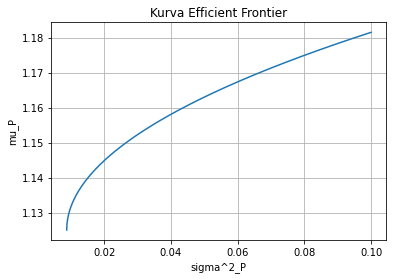

Nilai return dari variansi yang minimum adalah : 1.125


In [ ]:
sigma_P = np.linspace(0.00875,0.1,1000)
mu_p = np.sqrt((sigma_P- 0.00875)*0.035) + 1.125
plt.plot(sigma_P, mu_p)
plt.xlabel('sigma^2_P')
plt.ylabel('mu_P')
plt.grid(True)
plt.title('Kurva Efficient Frontier')
plt.show()
print(f'Nilai return dari variansi yang minimum adalah : {np.sqrt((np.min(sigma_P)- 0.00875)*0.035) + 1.125}')

Misalkan ditambahkan sebuah asset \textit{risk-free} dengan \textit{rate of return} $r = 1.02$. Maka diperoleh capital market linenya sebagai berikut : 